In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/

/content
/content/drive/MyDrive


In [ ]:
!unzip archive.zip

Streaming output truncated to the last 5000 lines.
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_back_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bar_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_base_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bath_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bean_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_beg_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bite_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_boat_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bone_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_book_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bought_angry.wav  
  inflating: TESS Toronto emotional 

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import librosa
import soundfile as sf
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [ ]:
DATA_PATH = "/content/drive/MyDrive/tess toronto emotional speech set data/TESS Toronto emotional speech set data"

In [ ]:
def AudioProcessing():
    emo_dir = os.listdir(DATA_PATH)
    mfcc_dir = {}
    for folder in emo_dir:
        for aud_file in os.listdir(os.path.join(DATA_PATH, folder)):
            file_path = os.path.join(DATA_PATH, folder, aud_file)
            sig, rate = sf.read(file_path)

            mfcc = librosa.feature.mfcc(y=sig , sr=rate, n_mfcc=13)
            delta = librosa.feature.delta(mfcc , mode='nearest')
            delta_delta = librosa.feature.delta(mfcc , order=2 , mode='nearest') 

            template = np.concatenate((mfcc,delta,delta_delta))
            template = template.T

            template = np.mean(template, axis=0)

            if aud_file.split("_")[2][:-4] not in mfcc_dir:
                mfcc_dir[aud_file.split("_")[2][:-4]] = [template]
            else:
                mfcc_dir[aud_file.split("_")[2][:-4]].append(template)

    return mfcc_dir

mfcc_dir = AudioProcessing()

In [ ]:
train, test = train_test_split(dataframe, test_size=0.33)

In [ ]:
label_dict = {"fear" : 1, "ps" : 2, "sad" : 3, "angry" : 4, "disgust" : 5, "happy" : 6, "neutral" : 7}

X_Train = []
Y_Train = []
for emotion in train:
    for row in train[emotion]:
        X_Train.append(row)
        Y_Train.append(label_dict[emotion])

X_Test = []
Y_Test = []
for emotion in test:
    for row in test[emotion]:
        X_Test.append(row)
        Y_Test.append(label_dict[emotion])

X_Train = np.array(X_Train)
Y_Train =  np.array(Y_Train)
X_Test = np.array(X_Test)
Y_Test = np.array(Y_Test)

X_Train, Y_Train = shuffle(X_Train, Y_Train)
X_Test, Y_Test = shuffle(X_Test, Y_Test)

In [ ]:
print(X_Train.shape, Y_Train.shape)

print(Y_Train)

(1876, 39) (1876,)
[4 3 3 ... 6 5 7]


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


def plot_feature_importance(importance,names,model_type):
    
    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)
    
    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    
    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_names'], y=fi_df['feature_importance'])
    #Add chart labels
    plt.title(model_type + 'Feature Importance')
    plt.xlabel('FEATURE NAMES')
    plt.ylabel('FEATURE IMPORTANCE')


#### Emotion Recognition using SVM 

##### RBF Kernel

In [ ]:
model = SVC(kernel = "rbf", gamma = 0.01)
model.fit(X_Train, Y_Train)

SVC(gamma=0.01)

In [ ]:
training_accuracy = model.score(X_Train, Y_Train)
test_accuracy = model.score(X_Test, Y_Test)

print(training_accuracy)
print(test_accuracy)

1.0
0.8690476190476191


##### Linear Kernel

In [ ]:
model = SVC(kernel = "linear")
model.fit(X_Train, Y_Train)

SVC(kernel='linear')

In [ ]:
training_accuracy = model.score(X_Train, Y_Train)
test_accuracy = model.score(X_Test, Y_Test)

print(training_accuracy)
print(test_accuracy)

0.9189765458422174
0.8712121212121212


##### Polynomial Kernel

In [ ]:
model = SVC(kernel = "poly", degree = 39)
model.fit(X_Train, Y_Train)

SVC(degree=39, kernel='poly')

In [ ]:
training_accuracy = model.score(X_Train, Y_Train)
test_accuracy = model.score(X_Test, Y_Test)

print(training_accuracy)
print(test_accuracy)

0.6316631130063965
0.6038961038961039


#### Emotion Recognition using MLP Classifier 

In [ ]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(random_state=1, max_iter=1000, solver = "adam", activation = "relu")
model.fit(X_Train, Y_Train)

MLPClassifier(max_iter=1000, random_state=1)

In [ ]:
training_accuracy = model.score(X_Train, Y_Train)
test_accuracy = model.score(X_Test, Y_Test)

print(training_accuracy)
print(test_accuracy)

0.9520255863539445
0.9101731601731602


#### Emotion Recognition using Decision Tree Classifier and Random Forests

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion= "entropy")
model.fit(X_Train, Y_Train)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
training_accuracy = model.score(X_Train, Y_Train)
test_accuracy = model.score(X_Test, Y_Test)

print(training_accuracy)
print(test_accuracy)

1.0
0.8041125541125541


In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_emo = RandomForestClassifier(n_estimators = 1024, criterion = "entropy", max_depth = 10, max_features = "sqrt")
model_emo.fit(X_Train, Y_Train)

RandomForestClassifier(criterion='entropy', max_depth=10, max_features='sqrt',
                       n_estimators=1024)

In [ ]:
training_accuracy = model_emo.score(X_Train, Y_Train)
test_accuracy = model_emo.score(X_Test, Y_Test)

print(training_accuracy)
print(test_accuracy)

1.0
0.9404761904761905


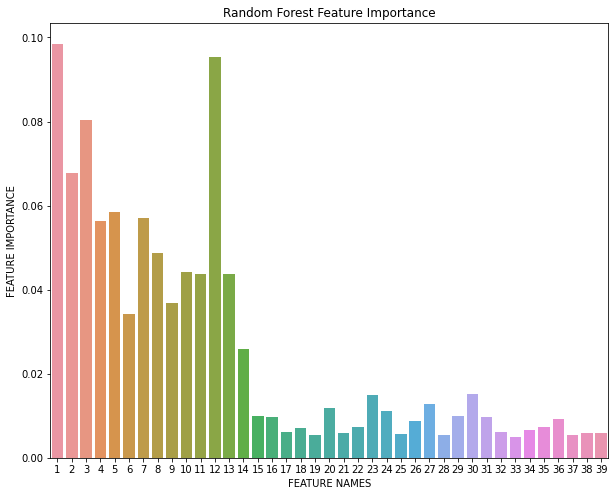

In [ ]:
features = [i for i in range(1, 40)]
plot_feature_importance(model_emo.feature_importances_, features, "Random Forest ")

In [ ]:
def AudioProcessingAge():
    emo_dir = os.listdir(DATA_PATH)
    mfcc_dir_age = {}
    label = {"O" : 0, "Y" : 1} 
    for folder in emo_dir:
        for aud_file in os.listdir(os.path.join(DATA_PATH, folder)):
            file_path = os.path.join(DATA_PATH, folder, aud_file)
            sig, rate = sf.read(file_path)

            mfcc = librosa.feature.mfcc(y=sig , sr=rate, n_mfcc=13)
            delta = librosa.feature.delta(mfcc , mode='nearest')
            delta_delta = librosa.feature.delta(mfcc , order=2 , mode='nearest') 

            template = np.concatenate((mfcc,delta,delta_delta))
            template = template.T

            template = np.mean(template, axis=0)

            if label[aud_file[0]] not in mfcc_dir_age:
                mfcc_dir_age[label[aud_file[0]]] = [template]
            else:
                mfcc_dir_age[label[aud_file[0]]].append(template)

    return mfcc_dir_age

mfcc_dir_age = AudioProcessingAge()

In [ ]:
train, test = train_test_split(dataframe, test_size=0.33)

In [ ]:
X_Train_age = []
Y_Train_age = []
for emotion in train:
    for row in train[emotion]:
        X_Train_age.append(row)
        Y_Train_age.append(emotion)

X_Test_age = []
Y_Test_age = []
for emotion in test:
    for row in test[emotion]:
        X_Test_age.append(row)
        Y_Test_age.append(emotion)

X_Train_age = np.array(X_Train_age)
Y_Train_age =  np.array(Y_Train_age)
X_Test_age = np.array(X_Test_age)
Y_Test_age = np.array(Y_Test_age)

X_Train_age, Y_Train_age = shuffle(X_Train_age, Y_Train_age)
X_Test_age, Y_Test_age = shuffle(X_Test_age, Y_Test_age)

#### Young or Old Classification using SVM

In [ ]:
model = SVC(kernel = "rbf", gamma = 0.01)
model.fit(X_Train_age, Y_Train_age)

SVC(gamma=0.01)

In [ ]:
training_accuracy = model.score(X_Train_age, Y_Train_age)
test_accuracy = model.score(X_Test_age, Y_Test_age)

print(training_accuracy)
print(test_accuracy)

1.0
0.9664502164502164


In [ ]:
model = SVC(kernel = "linear")
model.fit(X_Train_age, Y_Train_age)

SVC(kernel='linear')

In [ ]:
training_accuracy = model.score(X_Train_age, Y_Train_age)
test_accuracy = model.score(X_Test_age, Y_Test_age)

print(training_accuracy)
print(test_accuracy)

1.0
0.9956709956709957


In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_age = RandomForestClassifier(n_estimators = 1024, criterion = "entropy", max_depth = 10, max_features = "sqrt")
model_age.fit(X_Train_age, Y_Train_age)

RandomForestClassifier(criterion='entropy', max_depth=10, max_features='sqrt',
                       n_estimators=1024)

In [ ]:
training_accuracy = model_age.score(X_Train_age, Y_Train_age)
test_accuracy = model_age.score(X_Test_age, Y_Test_age)

print(training_accuracy)
print(test_accuracy)

1.0
1.0


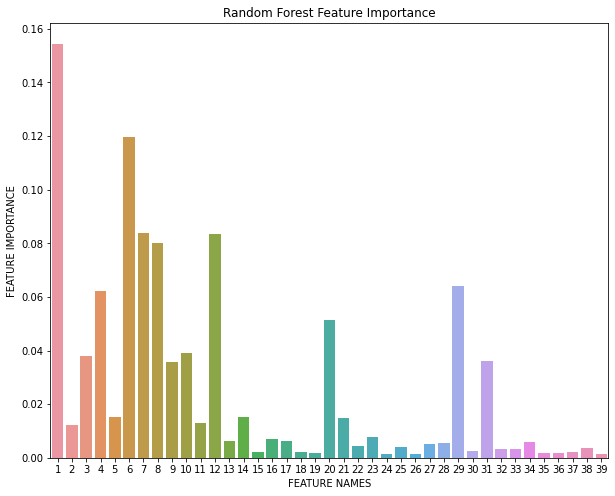

In [ ]:
features = [i for i in range(1, 40)]
plot_feature_importance(model_age.feature_importances_, features, "Random Forest ")

#### Test Example

In [ ]:
AUDIO_PATH = "/content/drive/MyDrive/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_neutral/YAF_bar_neutral.wav"
FILE = "YAF_bar_neutral.wav"

sig, rate = sf.read(AUDIO_PATH)

mfcc = librosa.feature.mfcc(y=sig , sr=rate, n_mfcc=13)
delta = librosa.feature.delta(mfcc , mode='nearest')
delta_delta = librosa.feature.delta(mfcc , order=2 , mode='nearest') 

template = np.concatenate((mfcc,delta,delta_delta))
template = template.T

template = np.mean(template, axis=0)
template = np.expand_dims(template, axis = 1)

template1 = [i for i in template]

emo = model_emo.predict(template.T)
age = model_age.predict(template.T)

lable_age = {0 : "Old", 1 : "Young"}  
lable_emo = { 1 : "fear", 2 : "ps", 3 : "sad", 4 : "angry", 5 : "disgust", 6 : "happy", 7 : "neutral"}

print("The emotion prediction on the file " + FILE + " is: " + str(lable_emo[emo[0]]))
print("The age classification (Young or old) on the file " + FILE + " is: " + str(lable_age[age[0]]))

The emotion prediction on the file YAF_bar_neutral.wav is: neutral
The age classification (Young or old) on the file YAF_bar_neutral.wav is: Young
